In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import star

In [2]:
# mpl.rcParams.update(
#     {'font.family': 'sans-serif',
#      'font.size': 16,
#      'axes.labelsize': 16,
#      'xtick.labelsize': 16,
#      'ytick.labelsize': 16,
#      'legend.fontsize': 16})

In [3]:
image_path = '/home/zelenyy/npm/another/scientific-papers/Russian-Phd-LaTeX-Dissertation/Dissertation/images/thunderstorm/'

In [3]:
material = star.electron.PredefinedMaterials.AIR_DRY_NEAR_SEA_LEVEL

In [4]:
data = star.electron.calculate_estar_table(material)

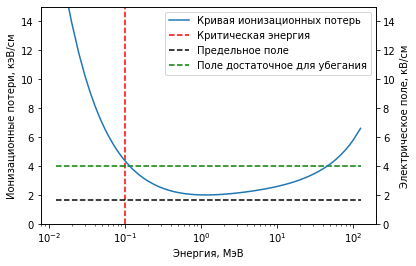

In [17]:
energy = data["energy"]
indx = (energy < 150) * (energy>0.01)
energy = energy[indx]
stopPower = data["stopping_power_total"][indx]

fig, ax1 = plt.subplots()
plt.plot(energy,stopPower*1.2e-3*1e3, label="Кривая ионизационных потерь")
ax1.set_ylim(0,15)
n = len(energy)
plt.vlines(0.1, 0 ,15, "r", linestyles="--", label="Критическая энергия")
plt.hlines(stopPower.min(), energy.min(), energy.max(),"k", linestyles="--", label="Предельное поле")
plt.hlines(4, energy.min(), energy.max(), "g", linestyles="--",label = "Поле достаточное для убегания")
# plt.plot(energy, np.ones(n)*4)
plt.xlabel(u'Энергия, МэВ')
plt.ylabel(r'Ионизационные потери, кэВ/см')
plt.xscale('log')
plt.legend(loc=0)
# plt.title(u'Energy loss');

ax2 = ax1.twinx()
ax2.set_ylim(0,15)
# ax2.hlines(1.5, energy.min(), energy.max(),"r", linestyles="--")
# ax2.hlines(4, energy.min(), energy.max(), "g", linestyles="--")
# ax2.plot(energy, np.ones(n)*1.5, 'r')
# ax2.plot(energy, np.ones(n)*4, 'g')
plt.ylabel(r'Электрическое поле, кВ/см');
# plt.legend()
# plt.tight_layout();
plt.savefig(os.path.join(image_path, '01_Gurevich.pdf'), transparent=True, format='pdf');

In [5]:
from phd.thunderstorm import atmosphere

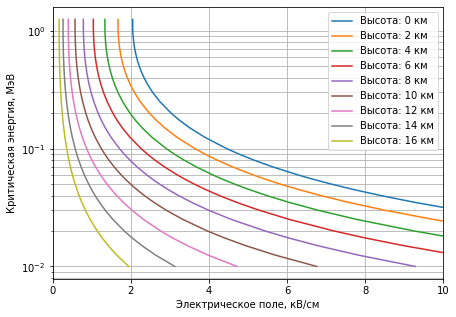

In [19]:
energy = data["energy"]
indx = (energy < 1.5) * (energy>0.001)
energy = energy[indx]
stopPower = data["stopping_power_total"][indx]

plt.figure(figsize=(7,5))
for h in np.arange(0, 17000, 2000):
    density = atmosphere.ISACalculator.density(h) # kg/m3
    y = stopPower*density # кэВ/см == кВ/см
    plt.plot(y, energy, label = "Высота: {} км".format(int(h/1000)))
plt.yscale("log")
plt.grid(which = "both")
plt.xlabel(r'Электрическое поле, кВ/см');
plt.ylabel(r'Критическая энергия, МэВ')
plt.xlim(0,10)
plt.legend();
plt.savefig(os.path.join(image_path, '02_CriticalEnergy.pdf'), transparent=True, format='pdf');

In [55]:
atmosphere.ISACalculator.density(5000)

0.7078257174850645

In [7]:
from tabulate import tabulate

energy = data["energy"]
indx = (energy < 1.5) * (energy>0.001)
energy = energy[indx]
stopPower = data["stopping_power_total"][indx]

critical_energy = [energy]
labels = ['Критическая энергия, МэВ']
for h in np.arange(0, 17000, 2000):
    density = atmosphere.ISACalculator.density(h) # kg/m3
    y = stopPower*density # кэВ/см == кВ/см
    critical_energy.append(y)
    labels.append("Высота: {} км".format(int(h/1000)))
    # plt.plot(y, energy, label = "Высота: {} км".format(int(h/1000)))

# plt.xlabel(r'Электрическое поле, кВ/см');
# plt.ylabel(r'Критическая энергия, МэВ')
text = tabulate(zip(*critical_energy), headers=labels)
print(text)

  Критическая энергия, МэВ    Высота: 0 км    Высота: 2 км    Высота: 4 км    Высота: 6 км    Высота: 8 км    Высота: 10 км    Высота: 12 км    Высота: 14 км    Высота: 16 км
--------------------------  --------------  --------------  --------------  --------------  --------------  ---------------  ---------------  ---------------  ---------------
                    0.01          24.2            19.7706         15.7943         12.2936         9.28172          6.76027          4.71739          3.12651          1.94613
                    0.0125        20.3748         16.6456         13.2978         10.3504         7.81462          5.69172          3.97175          2.63232          1.63852
                    0.015         17.6993         14.4597         11.5515          8.99123        6.78842          4.9443           3.45019          2.28665          1.42335
                    0.0175        15.7146         12.8383         10.2562          7.98301        6.02721          4.38988      